# POSTTEST 6
## Nama : Alinda Azzahra
## NIM    : 2009106092

## Mengimport library

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dts
from sklearn.cluster import KMeans

## Memanggil atau membaca dataset

In [15]:
db = pd.read_csv('Customer.csv')
db

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South
...,...,...,...,...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,64,United States,Philadelphia,Pennsylvania,19140,East
789,RS-19870,Roy Skaria,Home Office,39,United States,Burlington,Iowa,52601,Central
790,SC-20845,Sung Chung,Consumer,69,United States,Arlington Heights,Illinois,60004,Central
791,RE-19405,Ricardo Emerson,Consumer,35,United States,Kent,Ohio,44240,East


## Melihat total dataset

In [32]:
db.shape

(793, 9)

## Melihat nilai null

In [34]:
print(db.isna().sum())

Customer ID      0
Customer Name    0
Segment          0
Age              0
Country          0
City             0
State            0
Postal Code      0
Region           0
dtype: int64


## Melihat nilai duplikat

In [35]:
db_duplikat = db.copy()

In [36]:
db_duplikat.duplicated().sum()

0

## Membuat objek dari K Means dengan jumlah cluster 4

In [16]:
model = KMeans(n_clusters = 4)

## Memilih atribut yang akan dilatih

In [17]:
point = db[['Age', 'Postal Code']]

## Melakukan fit terhadap model

In [18]:
model.fit(point)

KMeans(n_clusters=4)

## Menentukan labels untuk cluster

In [19]:
label = model.labels_

In [20]:
label

array([3, 2, 3, 2, 3, 2, 0, 3, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 3, 0,
       3, 1, 3, 1, 1, 2, 0, 2, 1, 1, 3, 0, 3, 2, 3, 0, 0, 0, 2, 0, 2, 1,
       2, 0, 0, 0, 0, 3, 0, 1, 3, 3, 2, 3, 1, 0, 0, 2, 2, 3, 2, 1, 2, 0,
       2, 3, 3, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0,
       1, 2, 3, 1, 1, 3, 0, 0, 3, 2, 3, 0, 3, 2, 3, 3, 3, 3, 2, 0, 0, 2,
       2, 1, 0, 1, 0, 0, 0, 2, 3, 3, 2, 2, 1, 2, 3, 3, 0, 1, 1, 1, 0, 1,
       3, 1, 1, 2, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 2, 1, 0, 2, 0, 1,
       0, 2, 3, 3, 1, 3, 1, 2, 0, 2, 1, 0, 3, 1, 2, 2, 2, 2, 1, 3, 1, 0,
       3, 3, 0, 0, 3, 1, 3, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 3,
       0, 0, 3, 0, 2, 0, 3, 1, 3, 1, 2, 2, 3, 2, 0, 3, 3, 3, 1, 2, 0, 3,
       2, 2, 3, 2, 2, 2, 1, 2, 2, 0, 2, 0, 3, 2, 0, 2, 1, 1, 3, 1, 0, 1,
       3, 1, 0, 3, 1, 2, 0, 3, 0, 0, 2, 3, 3, 2, 1, 3, 0, 1, 0, 3, 3, 0,
       1, 3, 3, 1, 1, 2, 1, 2, 3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 0, 1, 2, 0,
       0, 0, 3, 2, 0, 1, 3, 3, 0, 3, 3, 3, 3, 2, 3,

In [21]:
x = point['Age']
y = point['Postal Code']

## Menampung koordinat dari setiap centroid

In [22]:
centroid = model.cluster_centers_

In [23]:
centroid

array([[4.49534884e+01, 7.06639593e+04],
       [4.52791878e+01, 1.32604061e+04],
       [4.37106383e+01, 9.22596383e+04],
       [4.41216931e+01, 3.88870370e+04]])

In [24]:
centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

## Menampilkan visualisasi cluster

<function matplotlib.pyplot.show(close=None, block=None)>

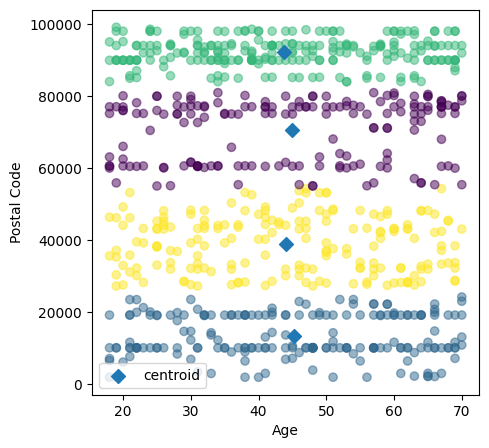

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha=0.5, c=label)
plt.scatter(centroid_x, centroid_y, marker='D', s=50, label='centroid')
plt.xlabel('Age')
plt.ylabel('Postal Code')
plt.legend()
plt.show

## Menentukan jumlah cluster

In [28]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(point)
    inertias.append(model.inertia_)

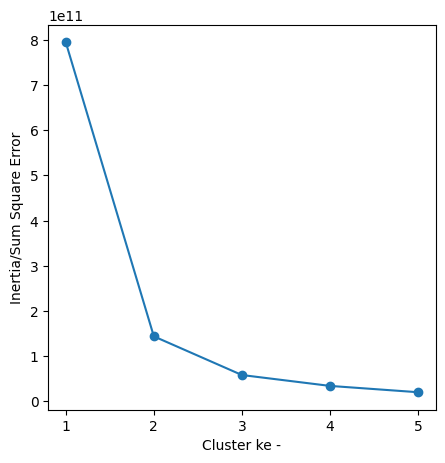

In [29]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke -')
plt.ylabel('Inertia/Sum Square Error')
plt.xticks(cluster_range)
plt.show()